Name -- Tharundi P.D.
Index -- 190626H

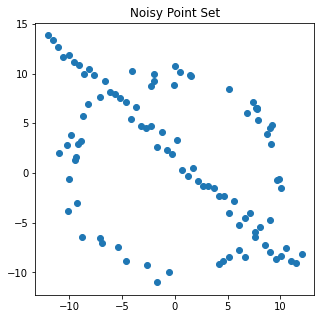

In [17]:
#Question_1
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
np.random.seed(45)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
t_ = 1.96*1
x , y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n ,1)))
X = np.vstack((X_circ, X_line))

fig, ax = plt.subplots(figsize = (5, 5))
ax.set_title('Noisy Point Set')
ax.scatter(X[..., 0], X[..., 1] )
plt.show()

12.052880456056386


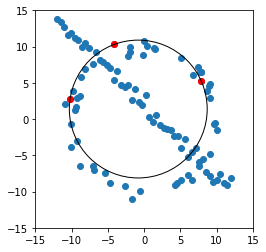

In [4]:
def define_circle(p1, p2, p3):
    
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    if abs(det) < 1.0e-6:
        return (None, np.inf)

    x = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    y = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det
    return ((x, y), np.sqrt((x - p1[0])**2 + (y - p1[1])**2))

p = 0.8
e = 0.5
s = 3
N = np.log10(1-p)/np.log10(1-(1-e)**s)
print(N)
max_k = 0

for i in range(int(N)):
    ind1 = np.random.randint(0, 2*half_n)
    ind2 = np.random.randint(0, 2*half_n)
    ind3 = np.random.randint(0, 2*half_n)
    c_1 = [X[..., 0][ind1], X[..., 1][ind1]]
    c_2 = [X[..., 0][ind2], X[..., 1][ind2]]
    c_3 = [X[..., 0][ind3], X[..., 1][ind3]]
    
    cen, rad = define_circle(c_1, c_2, c_3)
    k = 0

    for i in range(half_n):
        a, b = X[..., 0][i], X[..., 1][i]
        if cen is None: continue
        dis2 = np.sqrt((a-cen[0])**2 + (b - cen[1])**2)
        r = rad
        
        if r-t_ < dis2 < r + t_:
            k+=1
    
    if max_k < k:
        max_k = k
        f_c1, f_c2, f_c3 = c_1, c_2, c_3
        f_cen, f_rad = cen, rad
    

circle=plt.Circle(f_cen,f_rad, fill = False)
fig, ax = plt.subplots()
ax.add_patch(circle)
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])
ax.set_aspect('equal')
plt.scatter(X[..., 0], X[..., 1] )
plt.scatter(np.array((f_c1, f_c2, f_c3))[..., 0], np.array((f_c1, f_c2, f_c3))[..., 1], color = 'r')
plt.show()

[[147, 206]]
[[147, 206], [521, 289]]
[[147, 206], [521, 289], [521, 518]]
[[147, 206], [521, 289], [521, 518], [134, 523]]
[[ 2.92769124e-01 -1.82305125e-02  1.47000000e+02]
 [ 9.89004098e-02  3.11907838e-01  2.06000000e+02]
 [ 1.95686751e-04 -3.49913867e-05  1.00000000e+00]]


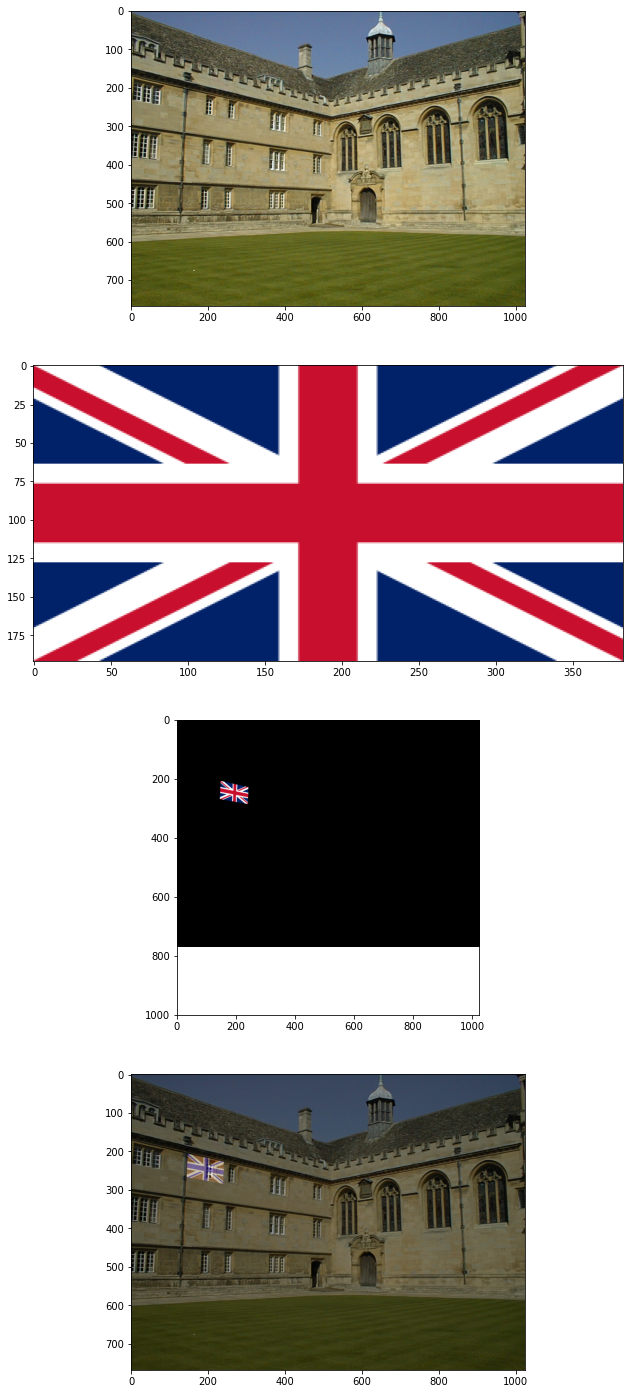

In [15]:
#Question_2
import cv2 as cv

dst_cordinate = [] 
def click_event(event, x, y, flags, params):
    
    if event == cv.EVENT_LBUTTONDOWN:
        dst_cordinate.append([x,y])
        print(dst_cordinate)
        if len(dst_cordinate) == 4: cv.destroyAllWindows()
 
img = cv.imread('images/001.jpg', 1)
assert img is not None
 

cv.imshow('image', img)
cv.setMouseCallback('image', click_event)
cv.waitKey(0)
cv.destroyAllWindows()

src_cordinate = [[0, 0], [1960, 0], [1960, 960], [0, 960]]
H, status = cv.findHomography(np.array(src_cordinate), np.array(dst_cordinate))
print(H)
im4 = cv.imread('Flag_of_the_United_Kingdom.svg.png')
assert im4 is not None

im1to4 = cv.warpPerspective(im4, H, (np.shape(img)[1], np.shape(img)[0]))

im1= cv.cvtColor(img, cv.COLOR_BGR2RGB)
im4= cv.cvtColor(im4, cv.COLOR_BGR2RGB)
im1to4= cv.cvtColor(im1to4, cv.COLOR_BGR2RGB)

dst = cv.addWeighted(img, 0.6, im1to4, 0.4, 0.0)
dst = cv.cvtColor(dst, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(4, 1, figsize=(25, 25))

ax[0].imshow(im1)
ax[1].imshow(im4)
ax[2].imshow(im1to4)
ax[2].set_ylim([1000, 0])
ax[2].set_aspect('equal')
ax[3].imshow(dst)
plt.show()


cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

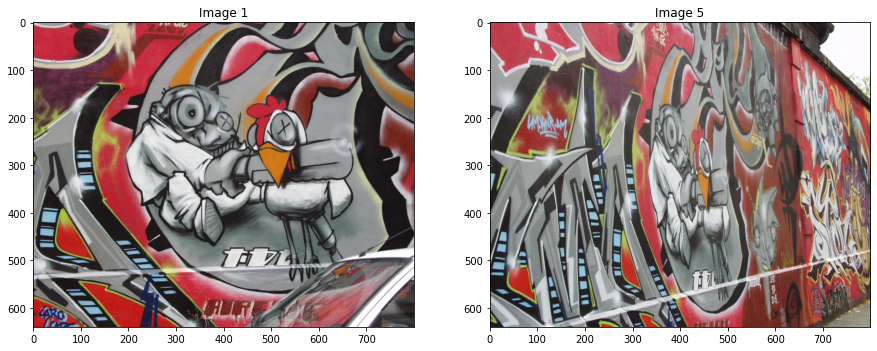

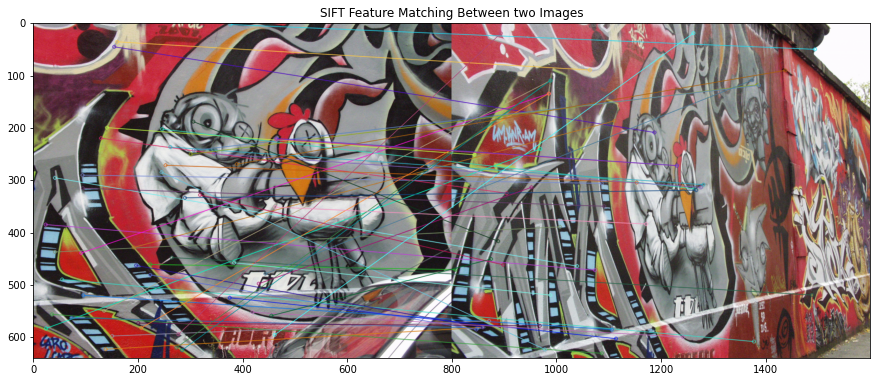

In [11]:
#Question 3
import cv2 as cv 
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
im1 = cv.imread('img1.ppm')  
im2 = cv.imread('img5.ppm') 

assert im1 is not None
assert im2 is not None

im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
im2 = cv.cvtColor(im2, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(im1)
ax[0].set_title('Image 1')
ax[1].imshow(im2)
ax[1].set_title('Image 5')
plt.show()

sift = cv.SIFT_create()

kp1, desc1 = sift.detectAndCompute(im1, None)
kp2, desc2 = sift.detectAndCompute(im2, None)

bf = cv.BFMatcher()
matches = bf.knnMatch(desc1, desc2, k=2)
good, pts1, pts2 = [], [], []

for m, n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

good, pts1, pts2 = np.array(good), np.array(pts1), np.array(pts2)
matched_img = cv.drawMatchesKnn(im1, kp1, im2, kp2, good[:50], None, flags=2)

fig, ax = plt.subplots(figsize = (15, 15))
ax.set_title('SIFT Feature Matching Between two Images')
ax.imshow(matched_img)
plt.show()

In [13]:
def homography(pts1, pts2):
    mean1, mean2 = np.mean(pts1, axis=0), np.mean(pts2, axis=0)
    s1, s2 = len(pts1)*np.sqrt(2)/np.sum(np.sqrt(np.sum((pts1-mean1)**2, axis=1))), len(pts1)*np.sqrt(2)/np.sum(np.sqrt(np.sum((pts2-mean2)**2, axis=1)))
    tx1, ty1, tx2, ty2 = -s1*mean1[0], -s1*mean1[1], -s2*mean2[0], -s2*mean2[1]
    T1, T2 = np.array(((s1, 0, tx1), (0, s1, ty1), (0, 0, 1))), np.array(((s2, 0, tx2), (0, s2, ty2), (0, 0, 1)))
    A = []

    for i in range(len(pts1)):
        X11, X21 = T1 @ np.concatenate((pts1[i], [1])).reshape(3, 1), T2 @ np.concatenate((pts2[i], [1])).reshape(3, 1)
        A.append((-X11[0][0], -X11[1][0], -1, 0, 0, 0, X21[0][0]*X11[0][0], X21[0][0]*X11[1][0], X21[0][0]))
        A.append((0, 0, 0, -X11[0][0], -X11[1][0], -1, X21[1][0]*X11[0][0], X21[1][0]*X11[1][0], X21[1][0]))
    
    A = np.array(A)
    U, S, V = np.linalg.svd(A, full_matrices=True)
    h = np.reshape(V[-1], (3, 3))
    H = linalg.inv(T2) @ h @ T1
    H = (1 / H.item(8)) * H
    return H

def dist(P1, P2, H):
    p1 = np.array([P1[0], P1[1], 1])
    p2 = np.array([P2[0], P2[1], 1])

    p2_estimate = np.dot(H, p1.T)
    p2_estimate = (1 / p2_estimate[2]) * p2_estimate
    return np.linalg.norm(p2.T - p2_estimate)

def RANSAC_homography(points1, points2):
    inlier_count, selected_inliers = 0, None
    points = np.hstack((points1, points2))
    num_iterations = int(np.log(1 - 0.95)/np.log(1 - (1 - 0.5)**4))
    
    for _ in range(num_iterations):
        np.random.shuffle(points)
        pts1, pts1_rem, pts2, pts2_rem = points[:4, :2],  points[4:, :2], points[:4, 2:], points[4:, 2:]
        H = homography(pts1, pts2)
        inliers = [(pts1_rem[i], pts2_rem[i]) for i in range(len(pts1_rem)) if dist(pts1_rem[i], pts2_rem[i], H) < 100]
        if len(inliers) > inlier_count:
            inlier_count = len(inliers)
            selected_inliers = np.array(inliers)
    
    H = homography(selected_inliers[:, 0], selected_inliers[:, 1])
    return H

H = RANSAC_homography(pts1, pts2)
print(H)



[[-3.17635816e-01 -1.75196095e+00  5.44582797e+02]
 [-2.61414125e-01 -1.24428525e+00  3.96262897e+02]
 [-5.97898815e-04 -3.19875629e-03  1.00000000e+00]]


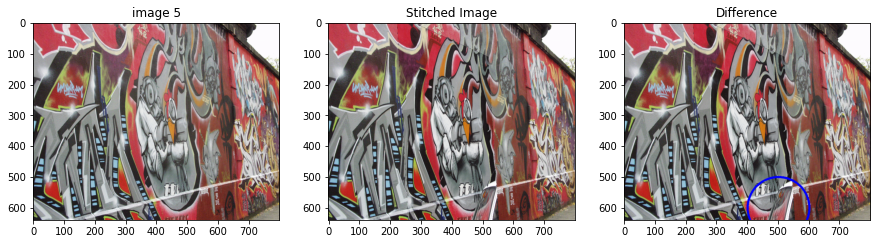

In [15]:
file = open(r"H1to5p", "r")
H = []

for _ in range(3):
    H.append(tuple(map(float, file.readline().strip().split())))

H = np.array(H)
img_p = cv.warpPerspective(im1, H, (im2.shape[1], im2.shape[0]))
ret, threshold = cv.threshold(img_p, 10, 1, cv.THRESH_BINARY_INV)
img2_thresholded = np.multiply(threshold, im2)
img_blended = cv.addWeighted(img2_thresholded, 1, img_p, 1, 0)

fig, ax = plt.subplots(1, 3, figsize=(15, 12))
ax[0].imshow(im2)
ax[0].set_title("image 5")
ax[1].imshow(img_blended)
ax[1].set_title("Stitched Image")

img_blended = cv.circle(img_blended, (500, 600), 100, (0, 0, 255), 5)

ax[2].imshow(img_blended)
ax[2].set_title("Difference")
plt.show()